In [148]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import cv2
%matplotlib inline

In [169]:
def erode_image(img, erosion_factor):
    kernel = np.ones((erosion_factor, erosion_factor), np.uint8)
    return cv2.erode(img, kernel, iterations=1)

def generate_goals(img, step, random_offset=None):
    height, width = img.shape
    goals = set()
    for y in range(step, height, step):
        for x in range(step, width, step):
            if img[y][x] > 250:
                inner_y = y
                inner_x = x
                if y < 40 and y > 30:
                    inner_y += 1
                if y < 30 and x > 30 and x < 40:
                    inner_x += 2
                if x > 30:
                    inner_x -= 2
                if y > 80:
                    inner_y += 3
                if y > 40 and y < 60:
                    inner_y -= 2
                if y > 65 and x > 20 and x < 30:
                    inner_x -= 2
                    
                goals.add((inner_x, inner_y))
    goals.add((35, 92))
    return goals

def draw_with_goals(img, goals):
    goal_img = img.copy()
    for p in goals:
        cv2.circle(goal_img, (p[0], p[1]), 2, (0, 255, 0), -1)
    plt.imshow(goal_img, cmap='gray')

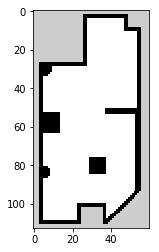

In [170]:
img = cv2.imread('../maps/bigMap.pgm', 0)
plt.imshow(img, cmap='gray')

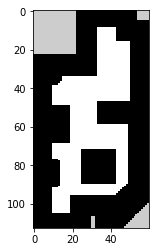

In [171]:
eroded = erode_image(img, 10)
plt.imshow(eroded, cmap='gray')

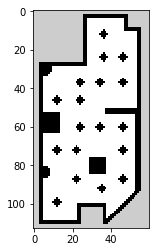

In [172]:
goals = generate_goals(eroded, 12)
draw_with_goals(img, goals)